# CS 422: Machine Learning - Apriori

### CS - 4201 (Group 3)

#### Libraries

> Be sure to have these libraries installed 

- mlxtend
- pandas

#### Leader

- Magbojos, Jenloke 

#### Members

- Javier, April Kate
- Kalalo, Febrj Yarrah
- Labay, Caryll
- Mendaña, Mark Yvan
- Mendoza, Kata Trixie
- Millena, Jericho James

In [1]:
# Here is where we import the libraries we will need for this assignment.

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# To reduce memory usage, we enable copy-on-write mode to avoid making unnecessary copies of the dataframe.
pd.options.mode.copy_on_write = True

In [3]:
# Now, we load the dataset in a dataframe named "df".
# Dataset na sinend ni Kate
# We set the header to None because the dataset does not have a header row (We're just working with item associations).
df = pd.read_csv('Trimmed_Market_Basket_Optimisation.csv', header = None)

# Here, we take a peek of the dataset, displaying the first 5 rows.
# We can see that the dataset is very straightforward.
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# The dataset is a list of transactions, where each transaction contains a list of items purchased together.
# We're just cleaning the data a bit to make it easier to work with.
df.fillna(0,inplace=True)

# *Peek*
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Here is the Data Pre-processing step where we convert the data in list format.
# For instance, transaction 1 contains the items ['milk', 'bread', 'eggs'].
# And transaction 2 contains the items ['milk', 'bread', 'eggs', 'butter'].
# We will use the TransactionEncoder to convert the data into:
# [['milk', 'bread', 'eggs'], ['milk', 'bread', 'eggs', 'butter']...]

transactions = []

for i in range(0,len(df)):
    transactions.append([str(df.values[i,j]) for j in range(0,20) if str(df.values[i,j])!='0'])

In [6]:
# To check if that worked, let's try printing a transaction.
transactions[1]

['burgers', 'meatballs', 'eggs']

In [7]:
# Here we transform the list of transactions into a format suitable for the mlxtend Apriori algorithm
# where each item is a column and each transaction is a row marked True (present) or False (not)

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [8]:
# Here, we generate frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# As well as the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=2)

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(almonds),(green tea),0.019802,0.148515,0.019802,1.000000,6.733333,1.0,0.016861,inf,0.868687,0.133333,1.000000,0.566667
1,(green tea),(almonds),0.148515,0.019802,0.019802,0.133333,6.733333,1.0,0.016861,1.130998,1.000000,0.133333,0.115825,0.566667
2,(avocado),(honey),0.079208,0.049505,0.019802,0.250000,5.050000,1.0,0.015881,1.267327,0.870968,0.181818,0.210938,0.325000
3,(honey),(avocado),0.049505,0.079208,0.019802,0.400000,5.050000,1.0,0.015881,1.534653,0.843750,0.181818,0.348387,0.325000
4,(avocado),(shrimp),0.079208,0.059406,0.019802,0.250000,4.208333,1.0,0.015097,1.254125,0.827957,0.166667,0.202632,0.291667


In [9]:
# Here, we convert antecedents (what is bought) and consequents (what it leads to) to readable strings
rules['lhs'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['rhs'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Here, we export all association rules (including weak ones) before filtering.
# We will compare the results with the filtered rules later. Stay tuned!

# We just want to keep the columns that are relevant to us so we select these:
# By the way, lhs means "left-hand side" or what was bought,
# and rhs means "right-hand side" or what it leads to
all_rules_df = rules[['lhs', 'rhs', 'support', 'confidence', 'lift']]

# To digest the values easier, we convert the support and confidence values to percentages.
# For example, 0.01 becomes 1% and 0.5 becomes 50%
all_rules_df ['support'] = (all_rules_df['support'] * 100).map("{:.2f}%".format)
all_rules_df ['confidence'] = (all_rules_df['confidence'] * 100).map("{:.2f}%".format)

# Then we save this output to a CSV file for later documentation.
all_rules_df.to_csv("all_apriori_rules.csv", index=False)
print("All association rules (including weak ones) saved to 'all_apriori_rules.csv'")

# *A peek* of the top 10 sorted by lift for all rules output
all_rules_df.sort_values('lift', ascending=False).head(10)

All association rules (including weak ones) saved to 'all_apriori_rules.csv'


,lhs,rhs,support,confidence,lift
670,"turkey, spaghetti","tomatoes, fresh tuna",1.98%,100.00%,50.5
720,"tomatoes, fresh tuna","turkey, mineral water, spaghetti",1.98%,100.00%,50.5
597,"frozen smoothie, spaghetti","escalope, mineral water",1.98%,100.00%,50.5
654,"tomatoes, mineral water","turkey, fresh tuna",1.98%,100.00%,50.5
655,"turkey, fresh tuna","tomatoes, mineral water",1.98%,100.00%,50.5
667,"tomatoes, fresh tuna","turkey, spaghetti",1.98%,100.00%,50.5
668,"tomatoes, spaghetti","turkey, fresh tuna",1.98%,100.00%,50.5
669,"turkey, fresh tuna","tomatoes, spaghetti",1.98%,100.00%,50.5
696,"tomatoes, mineral water","turkey, spaghetti",1.98%,100.00%,50.5
697,"turkey, spaghetti","tomatoes, mineral water",1.98%,100.00%,50.5


In [ ]:
# Here, we added a filter block to remove weak or irrelevant association rules.
# While the Apriori algorithm can generate many rules, not all of them are useful.
# So, we filter those low confidence and low lift rules out.
# This way, the output is more relevant and easier to interpret.

# Filter for stronger rules only (confidence ≥ 30% and lift ≥ 2)
filtered_rules = rules[
    (rules['confidence'] >= 0.3) &
    (rules['lift'] >= 2)  &
    (rules['support'] >= 0.02)
]

# Format readable versions again (since this is a filtered DataFrame)
filtered_rules['lhs'] = filtered_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
filtered_rules['rhs'] = filtered_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Again, we want to keep the columns that are relevant to us so we select these:
final_df = filtered_rules[['lhs', 'rhs', 'support', 'confidence', 'lift']]

# To digest the values easier, we convert the support and confidence values to percentages.
# For example, 0.01 becomes 1% and 0.5 becomes 50%
final_df ['support'] = (final_df['support'] * 100).map("{:.2f}%".format)
final_df ['confidence'] = (final_df['confidence'] * 100).map("{:.2f}%".format)


final_df.sort_values('lift', ascending=False).head(10)


,lhs,rhs,support,confidence,lift
167,shrimp,pasta,3.96%,66.67%,16.833333
166,pasta,shrimp,3.96%,100.00%,16.833333
142,honey,shrimp,2.97%,60.00%,10.100000
143,shrimp,honey,2.97%,50.00%,10.100000
386,fresh tuna,"mineral water, spaghetti",2.97%,75.00%,9.468750
383,"mineral water, spaghetti",fresh tuna,2.97%,37.50%,9.468750
21,body spray,soup,2.97%,75.00%,8.416667
20,soup,body spray,2.97%,33.33%,8.416667
249,burgers,"green tea, french fries",2.97%,30.00%,7.575000
244,"green tea, french fries",burgers,2.97%,75.00%,7.575000


In [11]:
# Charan! (●'◡'●) Final output.
# Saved the final filtered rules to a CSV file
final_df.to_csv("filtered_apriori_rules.csv", index=False)

print("Filtered association rules saved to 'filtered_apriori_rules.csv'")

Filtered association rules saved to 'filtered_apriori_rules.csv'


#### Visualization of association rules

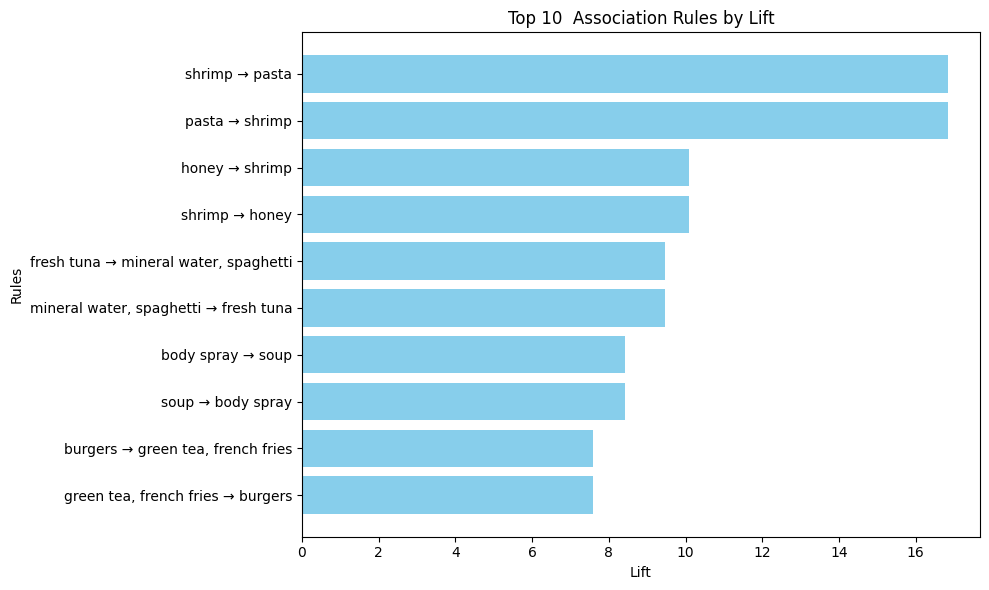

In [27]:
# Create rule strings again
final_df['rule'] = final_df['lhs'] + ' → ' + final_df['rhs']

# Convert lift back to float if needed (if accidentally converted to string)
final_df['lift'] = pd.to_numeric(final_df['lift'], errors='coerce')

# Sort and take top 10
top_10_filtered = final_df.sort_values(by='lift', ascending=False).head(10)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_10_filtered['rule'], top_10_filtered['lift'], color='skyblue')
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.title('Top 10  Association Rules by Lift')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
